In [12]:
%matplotlib notebook
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib

[120 255 255]


<IPython.core.display.Javascript object>


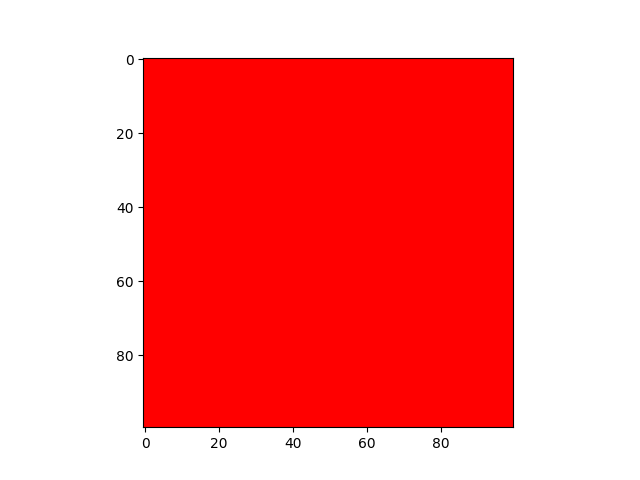

In [2]:
def ww():
    img = np.zeros((100, 100, 3), dtype=np.uint8)
    img[:, :, 0] = 255
    
    ii = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    print(ii[0, 0, :])
    
    f = plt.figure()
    plt.imshow(img)
    
    plt.show()
    
ww()

In [3]:
cone_points = pd.read_csv('cone_points.csv')
cone_points.head()

,r,g,b,x,y,z,identifier,in_bounds
0,233,121,32,4.953417,0.100611,-0.106224,path1,True
1,252,220,134,4.904496,0.130739,-0.111844,path1,True
2,232,172,75,4.991529,0.117265,-0.113828,path1,True
3,248,130,31,4.934327,0.108114,-0.112524,path1,True
4,228,117,26,4.946186,0.100548,-0.112794,path1,True


In [31]:
def compute_additional_color_spaces(points):
    bgr = np.zeros((points.shape[0], 1, 3), dtype=np.uint8)
    bgr[:, 0, 0] = points['r']
    bgr[:, 0, 1] = points['g']
    bgr[:, 0, 2] = points['b']
    
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
    hls = cv2.cvtColor(bgr, cv2.COLOR_BGR2HLS)
    
    points['hsv_h'] = hsv[:, 0, 0]
    points['hsv_s'] = hsv[:, 0, 1]
    points['hsv_v'] = hsv[:, 0, 2]
    
    points['hls_h'] = hls[:, :, 0]
    points['hls_l'] = hls[:, :, 1]
    points['hls_s'] = hls[:, :, 2]
    
    return points

cone_points_extended = compute_additional_color_spaces(cone_points)
cone_points_extended.head()

,r,g,b,x,y,z,identifier,in_bounds,hsv_h,hsv_s,hsv_v,hls_h,hls_l,hls_s
0,233,121,32,4.953417,0.100611,-0.106224,path1,True,107,220,233,107,133,209
1,252,220,134,4.904496,0.130739,-0.111844,path1,True,98,119,252,98,193,243
2,232,172,75,4.991529,0.117265,-0.113828,path1,True,102,173,232,101,154,197
3,248,130,31,4.934327,0.108114,-0.112524,path1,True,106,223,248,106,140,240
4,228,117,26,4.946186,0.100548,-0.112794,path1,True,106,226,228,106,127,203


<IPython.core.display.Javascript object>


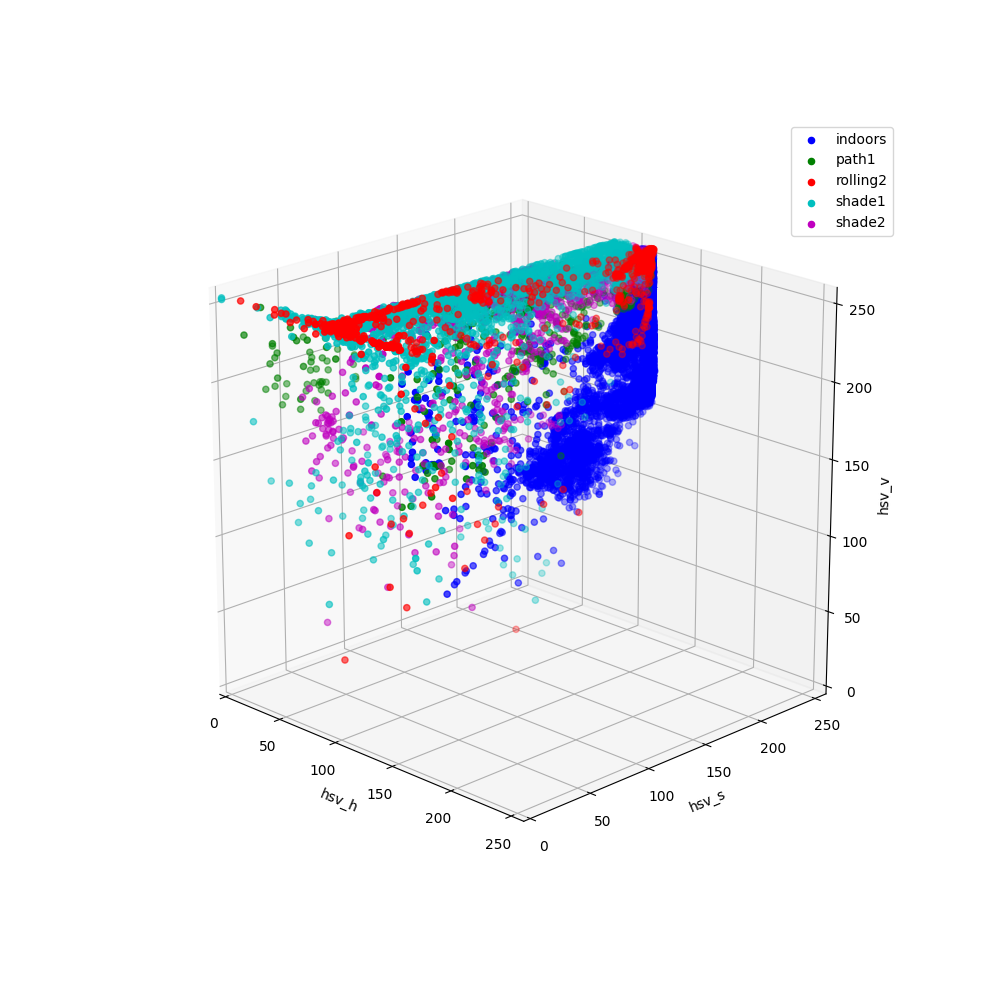

In [35]:
def plot_colors(points, ax1, ax2, ax3):
    identifiers = sorted(list(points['identifier'].unique()))
    num_identifiers = len(identifiers)
    
    colors_tableau = list(matplotlib.colors.BASE_COLORS)
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    for i in range(0, len(identifiers), 1):
        identifier = identifiers[i]
        c = colors_tableau[i]
        p = points[points['identifier'] == identifier]
        
        xs = list(p[ax1])
        ys = list(p[ax2])
        zs = list(p[ax3])

        ax.scatter(xs, ys, zs, label=identifier, color=c)

        ax.set_xlabel(ax1)
        ax.set_ylabel(ax2)
        ax.set_zlabel(ax3)

        ax.set_xlim(0, 255)
        ax.set_ylim(0, 255)
        ax.set_zlim(0, 255)
    
    plt.legend()
    plt.show()
    
plot_colors(cone_points, 'hsv_h', 'hsv_s', 'hsv_v')
#plot_colors(cone_points, 'hls_h', 'hls_l', 'hls_s')

In [23]:
def write_pcd(point_cloud, out_file, x, y, z):
    identifiers = sorted(list(point_cloud['identifier'].unique()))
    num_identifiers = len(identifiers)
    
    colors_tableau = list(matplotlib.colors.BASE_COLORS)
    
    colors_dict = {}
    for i in range(0, num_identifiers, 1):
        color = matplotlib.colors.to_rgb(colors_tableau[i])
        r = int(255.0 * color[0])
        g = int(255.0 * color[1])
        b = int(255.0 * color[2])
        
        colors_dict[identifiers[i]] = (r, g, b)
        
    
    with open(out_file, 'w') as f:
        f.write('VERSION .7\n')                                                                                                                                                                                           
        f.write('FIELDS rgb x y z\n')                                                                                                                                                                    
        f.write('SIZE 4 4 4 4\n')                                                                                                                                                                    
        f.write('TYPE U F F F\n')                                                                                                                                                                                        
        f.write('COUNT 1 1 1 1\n')                                                                                                                                                                                       
        f.write('WIDTH {0}\n'.format(point_cloud.shape[0]))                                                                                                                                                                                        
        f.write('HEIGHT 1\n')                                                                                                                                                                                               
        f.write('VIEWPOINT 0 0 0 1 0 0 0\n')                                                                                                                                                                                     
        f.write('POINTS {0}\n'.format(point_cloud.shape[0]))                                                                                                                                                                                               
        f.write('DATA ASCII\n')
        
        for idx, row in point_cloud.iterrows():
            r, g, b = colors_dict[row['identifier']]
            rgb = 0
            rgb |= (r << 16)
            rgb |= (g << 8)
            rgb |= (b)
            
            f.write('{0} {1} {2} {3}\n'.format(rgb, row[x], row[y], row[z]))    
            
write_pcd(cone_points, 'cone_hsv.pcd', 'hsv_h', 'hsv_s', 'hsv_v')

In [25]:
non_cone_points = pd.read_csv('non_cone_points.csv')
non_cone_points.head()

,r,g,b,x,y,z,identifier,in_bounds
0,164,168,147,8.375642,8.567211,0.164210,path1,False
1,199,204,179,8.354388,8.532598,0.163793,path1,False
2,220,224,200,8.615615,8.786121,0.168915,path1,False
3,196,201,174,8.783773,8.944074,0.172211,path1,False
4,155,160,131,8.687432,8.832588,0.170322,path1,False


In [27]:
non_cone_points_extended = compute_additional_color_spaces(non_cone_points)
non_cone_points.head()

,r,g,b,x,y,z,identifier,in_bounds,hsv_h,hsv_s,hsv_v,hls_h,hls_l,hls_s
0,164,168,147,8.375642,8.567211,0.164210,path1,False,84,32,168,84,158,27
1,199,204,179,8.354388,8.532598,0.163793,path1,False,84,31,204,84,192,50
2,220,224,200,8.615615,8.786121,0.168915,path1,False,85,27,224,85,212,71
3,196,201,174,8.783773,8.944074,0.172211,path1,False,84,34,201,84,188,51
4,155,160,131,8.687432,8.832588,0.170322,path1,False,85,46,160,85,146,34


In [28]:
write_pcd(non_cone_points, 'non_cone_hsv.pcd', 'hsv_h', 'hsv_s', 'hsv_v')

In [40]:
def hsv_filter(h, s, v):
    if (h < 75 or h > 120):
        return False
    
    if (s < 240 and v < 240):
        return False
    return True
    
def apply_hsv_filter(points):
    points['filter'] = points.apply(lambda r: \
        hsv_filter(r['hsv_h'], r['hsv_s'], r['hsv_v']), axis=1)
    
    return points

cone_points_filtered = apply_hsv_filter(cone_points_extended)
print(cone_points.groupby(by=['identifier', 'filter']).size())

identifier  filter
indoors     False      2282
            True      12246
path1       False       348
            True        870
rolling2    False       148
            True        630
shade1      False       591
            True       2982
shade2      False       460
            True       1172
dtype: int64


In [41]:
non_cone_points_filtered = apply_hsv_filter(non_cone_points_extended)
print(non_cone_points.groupby(by=['identifier', 'filter']).size())

identifier  filter
indoors     False     830228
            True        1590
path1       False     820955
            True        8399
rolling2    False     730887
            True       64724
shade1      False     784152
            True       20735
shade2      False     789293
            True       34592
dtype: int64


In [39]:
def compute_aspect_ratios(points):
    identifiers = points['identifier'].unique()
    
    aspect_ratios = {}
    
    for identifier in identifiers:
        p = points[points['identifier'] == identifier]
        
        miny = np.min(p['y'])
        maxy = np.max(p['y'])
        minz = np.min(p['z'])
        maxz = np.max(p['z'])
        
        width = maxy-miny
        height = maxz-minz
        
        ar = width/height
        
        out = {}
        out['width'] = width
        out['height'] = height
        out['ar'] = ar
        
        aspect_ratios[identifier] = out
        
    return aspect_ratios

aspect_ratios = compute_aspect_ratios(cone_points_filtered[cone_points_filtered['filter'] == True])

for identifier in aspect_ratios:
    data = aspect_ratios[identifier]
    print('For cone {0}...'.format(identifier))
    print('\twidth: {0}'.format(data['width']))
    print('\theight: {0}'.format(data['height']))
    print('\tar: {0}'.format(data['ar']))

For cone path1...
	width: 0.261373
	height: 0.474773
	ar: 0.5505220389533525
For cone rolling2...
	width: 0.2351350000000001
	height: 0.44390900000000016
	ar: 0.529691896312082
For cone shade1...
	width: 0.306535
	height: 0.474556
	ar: 0.6459406266067651
For cone shade2...
	width: 0.24780200000000008
	height: 0.43677199999999994
	ar: 0.5673486395648075
For cone indoors...
	width: 0.27116
	height: 0.46939400000000003
	ar: 0.5776810099830846
